# <span style="color:navy"> Esercitazione 2 </span>

## <span style="color:teal">  Esercizio 2.1</span>

In questo esercizio si vuole calcolare numericamente l’integrale

$$
I = \int_0^1 \frac{\pi}{2} \cos\left(\frac{\pi}{2} x\right) dx = 1
$$

utilizzando due metodi Monte Carlo e confrontandone l’efficienza.

#### 1. Metodo della Media

Si basa sulla generazione di $N$ punti casuali $x_i$ uniformemente distribuiti in $[0,1]$, e sul calcolo della media dei valori della funzione:

$$
I = \frac{1}{N} \sum_{i=1}^{N} f(x_i)
$$

È un metodo semplice da implementare e non richiede alcuna conoscenza della forma di $f(x)$. Tuttavia, può risultare inefficiente se $f(x)$ è significativa solo in porzioni ristrette dell'intervallo: molti punti contribuiranno poco al risultato e aggiungeranno solo rumore statistico.


#### 2. Importance Sampling

Per migliorare la stima, si può campionare non uniformemente ma secondo una distribuzione $p(x)$ simile alla forma di $f(x)$, riscrivendo l'integrale come:

$$
I = \int f(x) dx = \int \frac{f(x)}{p(x)} p(x) dx
$$

In questo modo si “concentrano” i punti nelle zone in cui $f(x)$ è più rilevante, riducendo la varianza della stima.

Nel nostro caso ho scelto $p(x) = 2 - 2x$, ottenuta come sviluppo di Taylor al primo ordine di $f(x)$ attorno a $x = 1$.

Per campionare secondo $p(x)$ ho usato il metodo dell’inversa della funzione cumulativa: ho generato $y$  in $(0,1)$, e posto $x = 1 - \sqrt{1 - y}$

Per entrambi i metodi ho effettuato $10^5$ lanci divisi in 100 blocchi

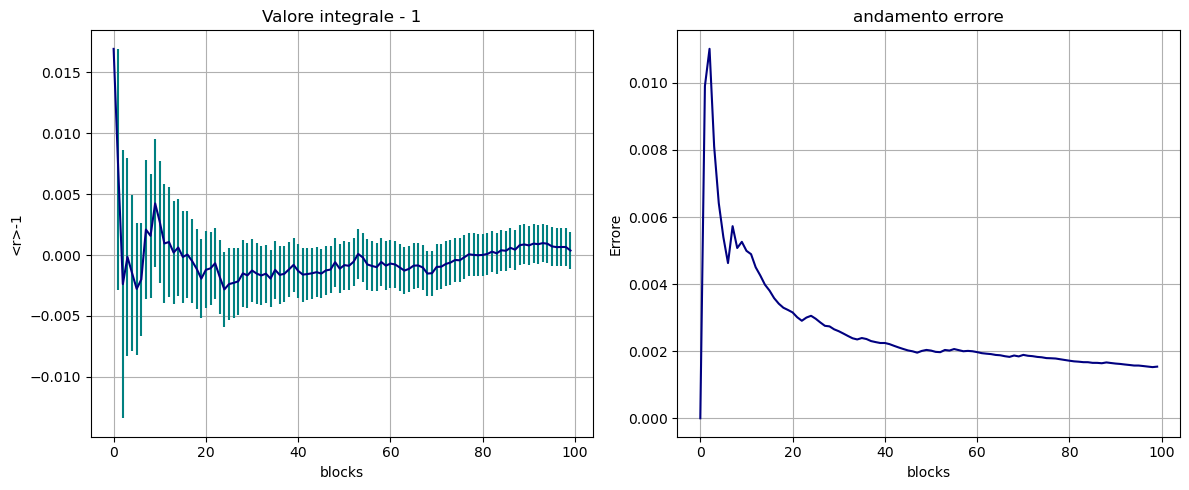

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M = 100000              # Total number of throws
N = 100                 # Number of blocks

# L = int(M/N)           # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)        # [0,1,2,...,N-1]

data_integ = np.loadtxt("Es1/integrale.dat")

integrale = data_integ[:,0]
errore_integ = data_integ[:,1]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primo grafico: integrale-1 con errore
axs[0].errorbar(x, integrale-1, yerr=errore_integ, color='navy', ecolor='teal')
axs[0].set_xlabel('blocks')
axs[0].set_ylabel('<r>-1')
axs[0].grid(True)
axs[0].set_title('Valore integrale - 1')

# Secondo grafico: errore in funzione dei blocchi
axs[1].plot(x, errore_integ, marker='', color='navy')
axs[1].set_xlabel('blocks')
axs[1].set_ylabel('Errore')
axs[1].grid(True)
axs[1].set_title('andamento errore')

plt.tight_layout()
plt.show()

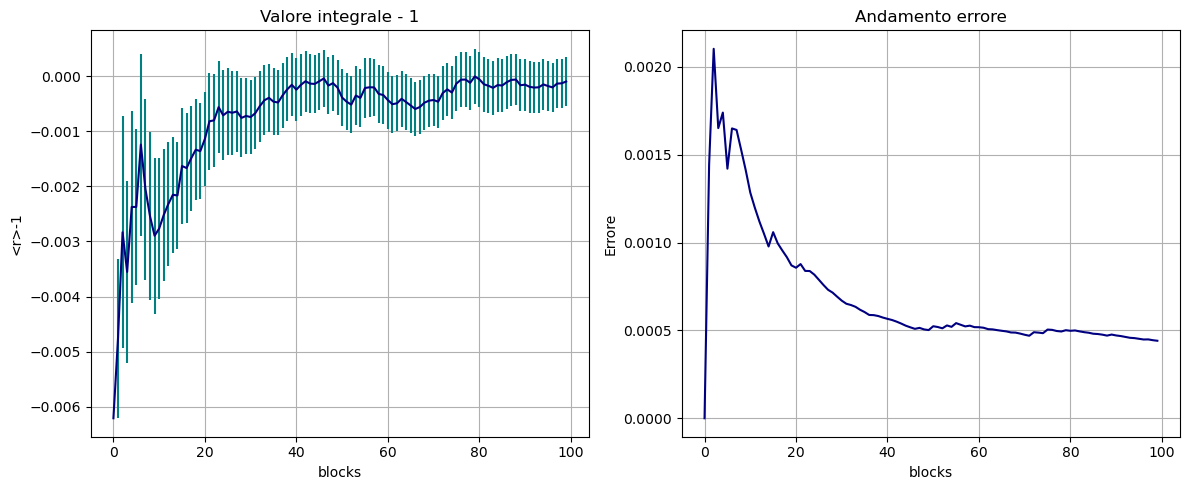

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M = 100000              # Total number of throws
N = 100                 # Number of blocks

# L = int(M/N)           # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)        # [0,1,2,...,N-1]

data_integ = np.loadtxt("Es1/integraleIS.dat")

integrale = data_integ[:,0]
errore_integ = data_integ[:,1]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Primo grafico: integrale-1 con errore
axs[0].errorbar(x, integrale-1, yerr=errore_integ, color='navy', ecolor='teal')
axs[0].set_xlabel('blocks')
axs[0].set_ylabel('<r>-1')
axs[0].grid(True)
axs[0].set_title('Valore integrale - 1')

# Secondo grafico: errore in funzione dei blocchi
axs[1].plot(x, errore_integ, marker='', color='navy')
axs[1].set_xlabel('blocks')
axs[1].set_ylabel('Errore')
axs[1].grid(True)
axs[1].set_title('Andamento errore')

plt.tight_layout()
plt.show()

Tutti e due i metodi convergono al risultato esatto dell'integrale, ma è interessante osservare come l'errore ottenuto con il secondo sia più piccolo di un ordine di grandezza rispetto al metodo della media standard: ciò è dovuto alla minore fluttuazione dei dati.

## <span style="color:teal">  Esercizio 2.2</span>

Il Random Walk è un modello matematico che descrive un percorso formato da una successione di passi casuali.

Un random walk è un esempio di catena di Markov: la posizione successiva dipende solo dalla posizione attuale e non dalla storia precedente del cammino.

In questo esercizio si simula il random walk partendo sempre dall'origine, in due scenari distinti:

- **Sul reticolo cubico**: ad ogni passo, il camminatore si muove avanti o indietro di una lunghezza $a = 1$ lungo una delle tre direzioni principali ($x$, $y$, $z$). La direzione e il verso del passo vengono determinati estraendo un numero casuale.

- **Nel continuo**: ad ogni passo, il camminatore si sposta di una distanza $a = 1$ in una direzione scelta casualmente e uniformemente nello spazio tridimensionale. La direzione viene generata campionando uniformemente l’angolo solido: $\phi \in [0, 2\pi]$ e $\theta \in [0, \pi]$, dove $\theta$ viene generato tenendo conto del Jacobiano della trasformazione sferica.

Ho effettuato $M = 10^4$ simulazioni, ciascuna composta da $n = 100$ passi, ho suddiviso i lanci in $N = 100$ blocchi e ho calcolato la radice della distanza quadratica media
$
\sqrt{\langle |\vec{r}_i|^2 \rangle}
$
per ciascun passo $i$, per entrambi i tipi di random walk.

I risultati sono rappresentati graficamente, ho provato a confrontare l’andamento con:

$$
f(N) = k\sqrt{N}
$$

per verificare se entrambi i modelli seguono un comportamento di tipo diffusivo.


/tmp/ipykernel_45465/3158982867.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(model, throws, x, sigma=err, absolute_sigma=True)


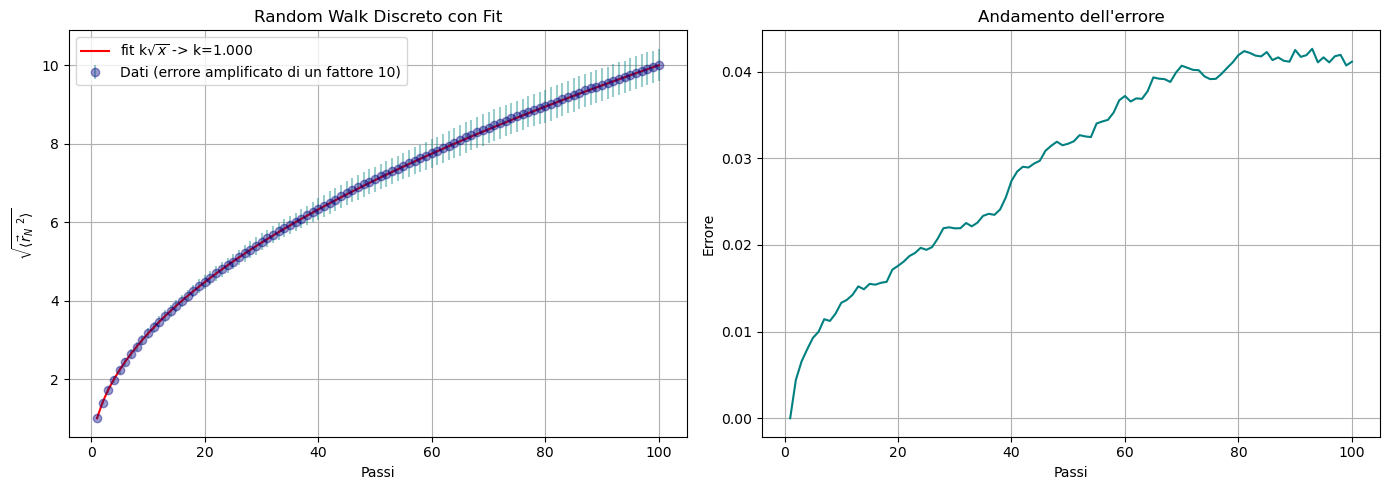

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Carica dati
N=100
throws = np.arange(N)+1
x, err = np.loadtxt("Es2/RW_discreto.dat", usecols=(0,1), unpack=True)

# Definisci modello
def model(x, k):
    return k * np.sqrt(x)

# Fit con pesi
popt, pcov = curve_fit(model, throws, x, sigma=err, absolute_sigma=True)
k_fit = popt[0]

# Crea figura con 2 subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Primo plot: dati + fit
ax1.errorbar(throws, x, yerr=err*10, fmt='o', label='Dati (errore amplificato di un fattore 10)', alpha=0.4, color = 'navy', ecolor = 'teal')
x_fit = np.linspace(min(throws), max(throws), 100)
ax1.plot(x_fit, model(x_fit, a_fit), 'r-', label=f'fit k$\sqrt{{x}}$ -> k={k_fit:.3f}')
ax1.set_xlabel('Passi')
ax1.set_ylabel(r"$\sqrt{\langle \vec{r}_N\ ^2 \rangle}$")
ax1.set_title('Random Walk Discreto con Fit')
ax1.legend()
ax1.grid(True)

# Secondo plot: andamento errore
ax2.plot(throws, err, '-', color = 'teal')
ax2.set_xlabel('Passi')
ax2.set_ylabel('Errore')
ax2.set_title('Andamento dell\'errore')
ax2.grid(True)

plt.tight_layout()
plt.show()

/tmp/ipykernel_45465/1522868410.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(model, throws, x, sigma=err, absolute_sigma=True)


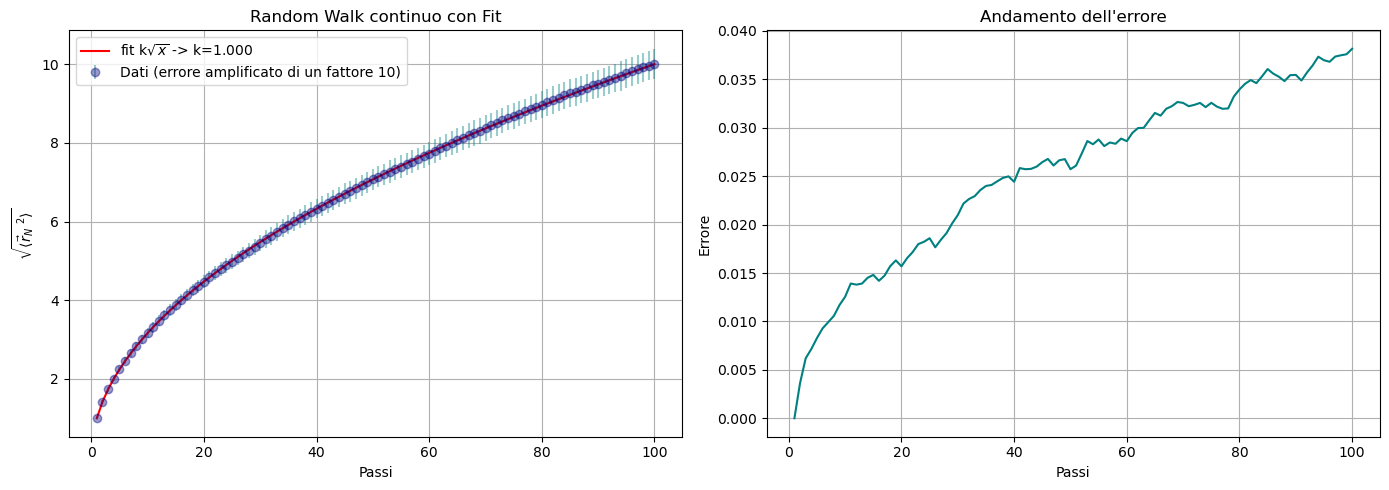

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Carica dati
N=100
throws = np.arange(N)+1
x, err = np.loadtxt("Es2/RW_continuo.dat", usecols=(0,1), unpack=True)

# Definisci modello
def model(x, a):
    return a * np.sqrt(x)

# Fit con pesi
popt, pcov = curve_fit(model, throws, x, sigma=err, absolute_sigma=True)
a_fit = popt[0]

# Crea figura con 2 subplot affiancati
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Primo plot: dati + fit
ax1.errorbar(throws, x, yerr=err*10, fmt='o', label='Dati (errore amplificato di un fattore 10)', alpha=0.4, color = 'navy', ecolor = 'teal')
x_fit = np.linspace(min(throws), max(throws), 100)
ax1.plot(x_fit, model(x_fit, a_fit), 'r-', label=f'fit k$\sqrt{{x}}$ -> k={k_fit:.3f}')
ax1.set_xlabel('Passi')
ax1.set_ylabel(r"$\sqrt{\langle \vec{r}_N\ ^2 \rangle}$")
ax1.set_title('Random Walk continuo con Fit')
ax1.legend()
ax1.grid(True)

# Secondo plot: andamento errore
ax2.plot(throws, err, '-', color = 'teal')
ax2.set_xlabel('Passi')
ax2.set_ylabel('Errore')
ax2.set_title('Andamento dell\'errore')
ax2.grid(True)

plt.tight_layout()
plt.show()

Dai grafici ottenuti e dal valore k=1 del parametro del fit possiamo concludere che entrambi i random walk manifestano un comportamento diffusivo. Infatti il valore medio del quadrato della distanza dal punto di partenza $\langle |\vec{r}|^2 \rangle$, cresce linearmente con il numero di passi $N$, di conseguenza, la radice quadrata $
\sqrt{\langle |\vec{r}|^2 \rangle}
$
 cresce proporzionalmente a $\sqrt{N}$.